{}


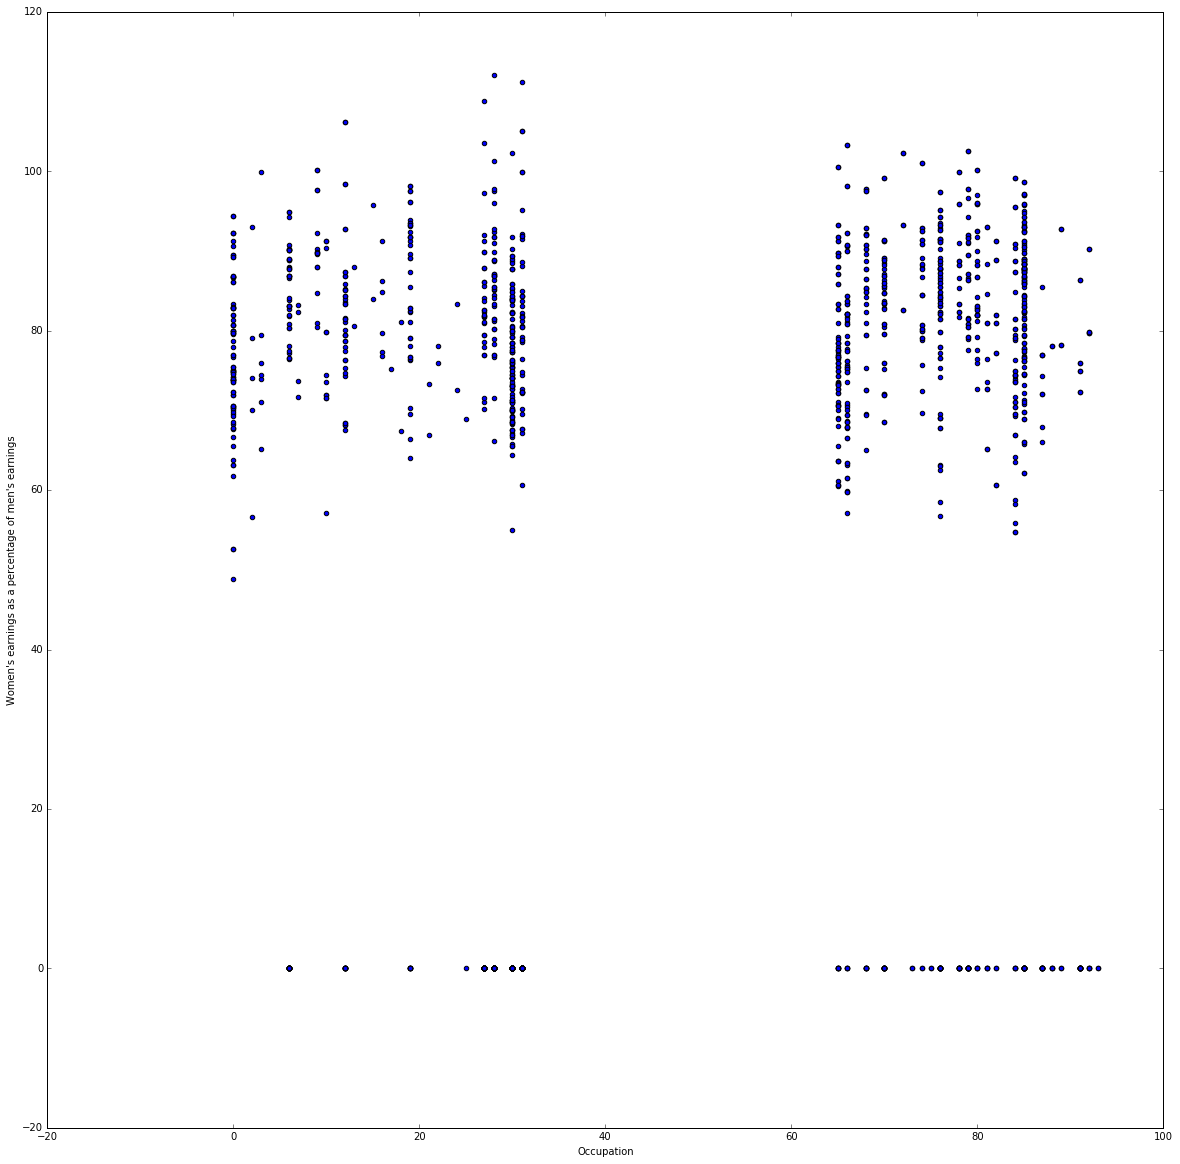

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Take compiled_census.csv and extract each column to a separate list
# Column names: year, occupation, m_salary, f_salary, f_salary/m_salary
df = pd.read_csv('compiled_census.csv')

year = df.Year 
occupation = df.OccupationalCategory.tolist()
m_salary = df.Men.tolist()
f_salary = df.Women.tolist()
percentage = df.Percentage.tolist()

id_to_category = {} # {id : category}
category_to_occ = {} # {category : occupation}
occ_to_category = {} # {occupation : category}

index = 0
category = None
for i in range(len(occupation)):
    if (':' in occupation[i]):
        category = occupation[i]
        id_to_category[index] = category
        index += 1
    else:
        if category in category_to_occ.keys():
            category_to_occ[category].append(occupation[i])

        else:
            category_to_occ[category] = [occupation[i]]

category_to_id = {v: k for k, v in id_to_category.items()}
for category, occupations in category_to_occ.items():
    for occ in occupations:
        occ_to_category[occ] = category
        
xaxis = np.zeros(len(occupation))
for i in range(len(occupation)):
    if ':' not in occupation[i]:
        xaxis[i] = category_to_id[occ_to_category[occupation[i]]]

category_to_salary = {} # {category : [msalary, fsalary]}
category = occ_to_category.values()[0]
for i in range(len(occ_to_category.keys())):
    if category == occ_to_category.keys()[i]:
        if category in category_to_salary.keys():
            category_to_salary[category] = list([m_salary[i],  f_salary[i]])
        else:
            category_to_salary[category].append([m_salary[i],  f_salary[i]])
    else:
        category = occ_to_category.keys()[i]
#print category_to_salary
# plot percentages
fig = plt.figure(figsize=(20,20)) 
plt.scatter(xaxis,percentage, c='blue',alpha='1')
plt.ylabel("Women's earnings as a percentage of men's earnings")
plt.xlabel("Occupation")
plt.show()


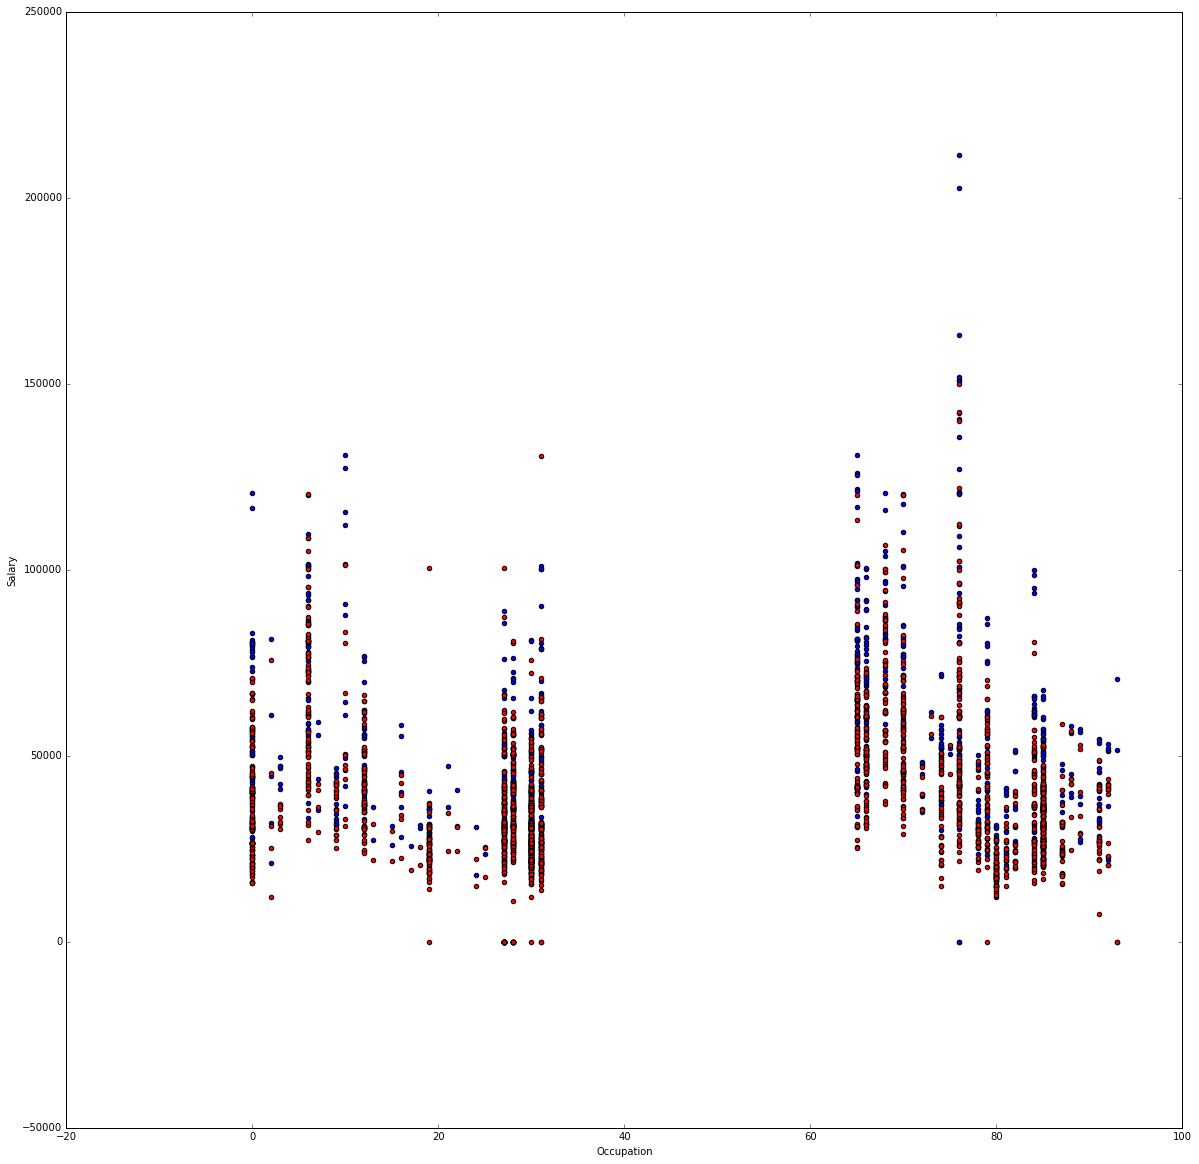

In [35]:
fig = plt.figure() 
plt.scatter(xaxis, m_salary, c='blue', alpha='1')
plt.scatter(xaxis, f_salary, c='red', alpha='1')
plt.rcParams["figure.figsize"] = [20,20]
plt.ylabel('Salary')
plt.xlabel('Occupation')
plt.show()

In [41]:
# enter occupation category
occupation_categories = category_to_occ.keys()
#print occupation_categories

# assume a normal distribution
# find average and standard deviation

print category_to_salary

for category, tup in category_to_salary.items():
    print "occupation category: " + category
    print tup
    msalary = tup[0]
    mmean = np.average(fsalary)
    mstd = np.std(msalary)
    fsalary = tup[1]
    fmean = np.average(fsalary)
    fstd = np.std(fsalary)
    
    print mmean
    print fmean

    if mmean < fmean:
        if mmean + (mstd*.3) < fmean:
            print "You make " + mmean/float(fmean) + " percent of a woman's salary"
            print "You should negotiate your salary: " + str(mmean) + "\nto: " + str(mmean + (mstd*.3))
    if fmean < mmean:
        if fmean + (fstd*.3) < mmean:
            print "You make " + fmean/float(mmean) + " percent of a man's salary"
            print "You should negotiate your salary: " + str(fmean) + "\nto: " + str(fmean + (fstd*.3))

    

{}
